# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


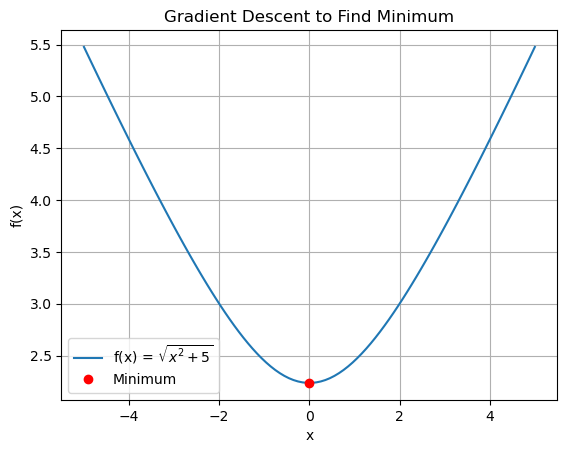

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 50; # the number of iterations
alpha = 1 # step size
initial_guess = 8/5+1 # initial guess
x = np.linspace(-5,5,100); # range of x values [-5,5]

# Define the function f(x).
def f(x):
    return np.sqrt(x**2+5)

f_x = f(x) # f(x) values

# Plot the function f(x), np.linspace might be helpful.

plt.plot(x,f_x, label='f(x) = $\\sqrt{x^2 + 5}$')
plt.plot(0, f(0), 'ro', label='Minimum')
plt.title('Gradient Descent to Find Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()


0.000000


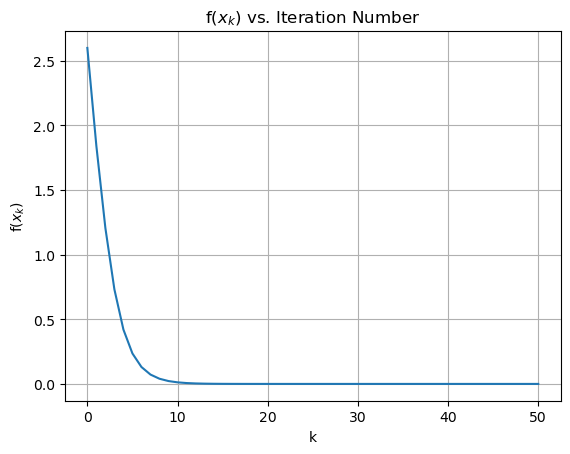

In [10]:

# Define the derivative of the function f(x), for gradient descent
def derivative_f(x,f_x):
    return x / f_x

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.

def GD(x_0, step_size, num_iterations):
    x_list = [] # x values holder during GD # record the values of x
    x_list.append(x_0) # append the initial x value into the list

    for k in range(num_iterations):
        dt = derivative_f(x_0,f(x_0)) # use predifined function f(x), derivative_f
        new_x = x_0 - dt*step_size # new x value from GD
        x_list.append(new_x) # append new x value into the list
        x_0 = new_x # update x_0 for next iteration

    return x_list

# set up/assign initial values
x_0 = initial_guess
step_size = alpha 
num_iterations = T

# Run gradient descent by calling the function
GD_val = GD(x_0, step_size, num_iterations)

# report x_T by printing out the value
print(f"{GD_val[-1]:.6f}") # print the last value of the GD result

# Plot the f(x_k) values vs. iteration number
plt.plot(np.arange(num_iterations+1), GD_val)
plt.title('f($x_k$) vs. Iteration Number')
plt.xlabel('k')
plt.ylabel('f($x_k$)')
plt.grid()
plt.show()


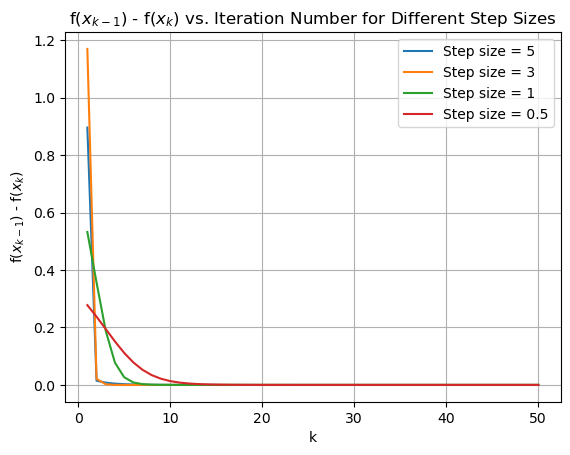

In [11]:
# create a list containing step sizes
step_sizes = [5,3,1,0.5]

# initialize a list to store the results from different step sizes
x_5_list = []
x_3_list = []
x_1_list = []
x_05_list = []

# loop through the step sizes and perform GD and record results
for i in step_sizes:
    result = np.array(GD(x_0, i, num_iterations))

    if i == 5:
        x_5_list = f(result[:-1])-f(result[1:])  # store f(x_k-1) - f(x_k)
    elif i == 3:
        x_3_list = f(result[:-1])-f(result[1:])  # store f(x_k-1) - f(x_k)
    elif i == 1:
        x_1_list = f(result[:-1])-f(result[1:])  # store f(x_k-1) - f(x_k)
    else:
        x_05_list = f(result[:-1])-f(result[1:])  # store f(x_k-1) - f(x_k)

# plot multiple curves in a single graph
plt.plot(np.arange(1,num_iterations+1), x_5_list, label='Step size = 5')
plt.plot(np.arange(1,num_iterations+1), x_3_list, label='Step size = 3')
plt.plot(np.arange(1,num_iterations+1), x_1_list, label='Step size = 1')
plt.plot(np.arange(1,num_iterations+1), x_05_list, label='Step size = 0.5')
plt.xlabel('k')
plt.ylabel('f($x_{k-1}$) - f($x_k$)')
plt.title('f($x_{k-1}$) - f($x_k$) vs. Iteration Number for Different Step Sizes')
plt.legend()
plt.grid()
plt.show()

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.240
Coefficients: [3.707, 0.666]


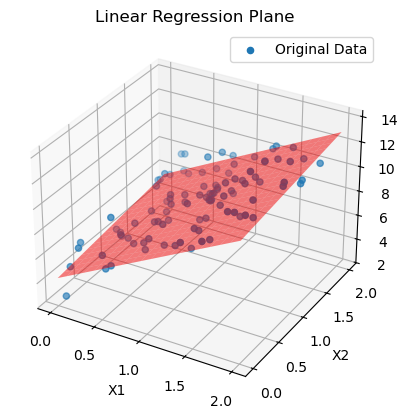

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(38)   # change the seed to be the last two digits of your SB ID.
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise


# Add a column of ones to X for the bias terms (intercept) in the normal equation
x_bias = np.ones((100, 1))  # columns of ones
X_aug = np.c_[x_bias, X] # add bias column to X # augmented X matrix


# Find theta using the normal equation
theta = np.linalg.inv(X_aug.T@(X_aug))@(X_aug.T)@y

# Print the intercept and coefficients of the regression plane
print(f"Intercept: {theta[0]:.3f}")
print(f"Coefficients: [{theta[1]:.3f}, {theta[2]:.3f}]")

# Plot the generated data and the regression plane

ax = plt.figure().add_subplot(projection='3d') # setting up 3D plot
ax.scatter3D(X[:, 0], X[:, 1], y, label='Original Data') # scatter plot of original data

X1, X2 = np.meshgrid(np.linspace(0,2,20), np.linspace(0,2,20)) # create a meshgrid for X1 and X2
Y_expect = theta[0]+theta[1]*X1+theta[2]*X2 # expected y values from regression plane

ax.plot_surface(X1, X2, Y_expect, color='red', alpha = 0.5) # regression plane
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Linear Regression Plane')
ax.legend()
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# define the Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


np.random.seed(595) # set seed for reproducibility
X = np.random.rand(2, 100) # 100 random 2D data points
w_true = np.array([1.5, -2.5]) # true weights
b_true = 1.0  # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true) # probabilities from sigmoid function

# Generate binary labels based on probabilities # if prob>0.5 assign 1 else 0
Y = (probabilities > 0.5).astype(int) 
# add noise to the data points to make the classification more liek realistic
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split the dataset into training and testing sets
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# parameters
w = np.zeros(X.shape[0]) # initialize weights
b = 0.0 # initialize bias


# aim : make the accuracy result of test be high as possible
learning_rate = 0.05 # I set the learning rate to be small to prevent overshooting
num_epch = 3000 # high number of epochs for better convergence # since I set a small learning rate, high epochs are needed


# training starts
for k in range(num_epch):
    # Forward propagation
    A_train = sigmoid(np.dot(w.T, X_train) + b)
    # Compute gradients
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train) # gradient w.r.t. weights
    dJdb = np.mean(A_train - Y_train) # gradient w.r.t. bias
    # Update parameters
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb


# Test accuracy
# use training data
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

# Use unseen test data
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# Calculate accuracies
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.86
Test Set Accuracy: 1.00


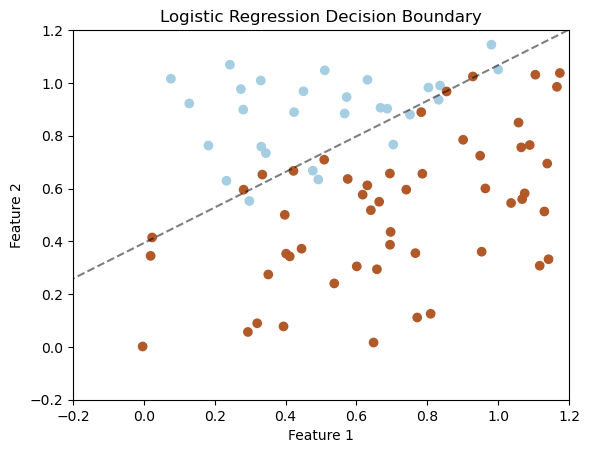

In [14]:
# visualization
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()
# Plot decision boundary using meshgrid
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# plot contour line
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

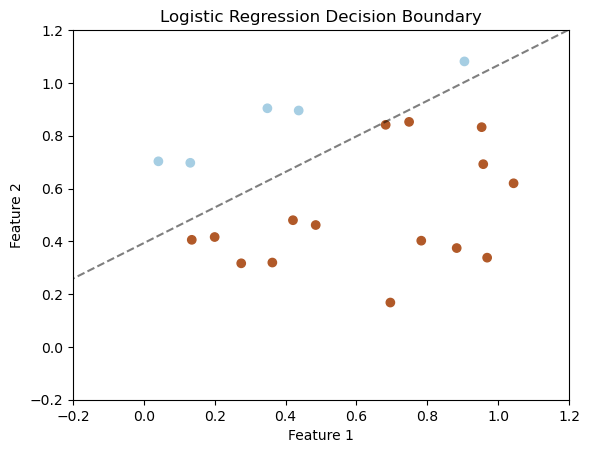

In [15]:
# visualization for test data
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
# plot contour line
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

In [16]:
# Install missing packages if necessary (run in notebook)
#%pip install --quiet torchvision

import torch
import torch.nn as nn
import torch.optim 
from torch.utils.data import DataLoader, Dataset

import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from torchvision import transforms, models

c:\Users\David\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Loss value: 0.6616361737251282
Epoch [2/10], Loss value: 0.5336343688624245
Epoch [3/10], Loss value: 0.4190951074872698
Epoch [4/10], Loss value: 0.3611983614308493
Epoch [5/10], Loss value: 0.29441934398242403
Epoch [6/10], Loss value: 0.2616798835141318
Epoch [7/10], Loss value: 0.2538688885314124
Epoch [8/10], Loss value: 0.27033296866076334
Epoch [9/10], Loss value: 0.2603825969355447
Epoch [10/10], Loss value: 0.2674811397280012
Indices of incorrect predictions: [13, 29]


C:\Users\David\AppData\Local\Temp\ipykernel_25496\2087635318.py:128: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Index: {idx}\nTrue: {int(label_list[idx])}, Pred: {int(pred_list[idx])}")


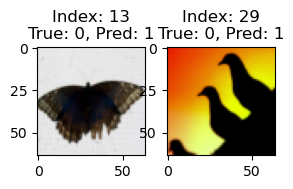

In [17]:
# Define Device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Dataset Class for classification task
class CatDataset(Dataset):
    def __init__(self, path, x, y, transform=None):
        self.h5 = h5py.File(path, 'r')
        self.x_data = self.h5[x][:]
        self.y_data = self.h5[y][:]
        self.transform = transform
        
    def __len__(self):
        return len(self.y_data)
    
    def __getitem__(self, idx):
        image = self.x_data[idx]
        label = self.y_data[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, torch.tensor(label, dtype=torch.float32)

# Pipeline for preprocessing of the image. 
transform = transforms.Compose([

    # Convert a tensor or an ndarray to PIL Image
    # Original array is H x W x C
    # 3 channel, default mode is RGB
    transforms.ToPILImage(),

    # Resize into a fixed size same as ImageNet dataset
    transforms.Resize((224, 224)),

    # Flip the image horizontally using the default probability 0.5
    transforms.RandomHorizontalFlip(),

    # Transform to pytorch tensor
    transforms.ToTensor(),

    # Normalizes the pixel values using mean and std of the ImageNet dataset
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Datasets from the same folder where this script is located
train_data = CatDataset('train_catvnoncat.h5', 'train_set_x', 'train_set_y', transform)
test_data = CatDataset('test_catvnoncat.h5', 'test_set_x', 'test_set_y', transform)

train_load = DataLoader(train_data, batch_size=30, shuffle=True)
test_load = DataLoader(test_data, batch_size=30, shuffle=False)

# Load pretrained model. 
# ResNet from https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Binary classification (1 output); ''' Set hyperparameters '''

# Use Binary Cross Entropy With Logits Loss for binary classification
criterion = nn.BCEWithLogitsLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# Set scheduler to adjust learning rate during training
# StepLR reduce the learning rate by gamma after step_size of epoches
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1e-6)

model = model.to(device)

# Training part

num_epch = 10

for k in range(num_epch):
    model.train()
    run_loss = 0.0
    
    for i, (images, labels) in enumerate(train_load):
        images = images.to(device)
        labels = labels.to(device).unsqueeze(1)
        
        optimizer.zero_grad()
        result = model(images)
        loss = criterion(result, labels)
        loss.backward()
        optimizer.step()
        
        run_loss += loss.item()
        
    scheduler.step()
    print(f"Epoch [{k+1}/{num_epch}], Loss value: {run_loss/len(train_load)}")

# Evalution with test set
model.eval()
incorrect_index = []
pred_list = []
label_list = []

# Load test images
file_test = h5py.File('test_catvnoncat.h5', 'r')
x_test_data = file_test['test_set_x'][:]

with torch.no_grad():
    for i, (images, labels) in enumerate(test_load):
        images = images.to(device)
        labels = labels.to(device).unsqueeze(1)
        
        result = model(images)
        probs = torch.sigmoid(result)
        preds = (probs > 0.5)
        
        # Check for errors
        # Calculate global index based on batch
        idx = i * 30 
        for h in range(len(preds)):
            if preds[h] != labels[h]:
                incorrect_index.append(idx + h)
        
        pred_list.extend(preds.cpu().numpy())
        label_list.extend(labels.cpu().numpy())

# Incorrect index Report
print("Indices of incorrect predictions:", incorrect_index)

# Show 4 failed cases 
if len(incorrect_index) > 0:
    for i in range(min(4, len(incorrect_index))):
        idx = incorrect_index[i]
        plt.subplot(1, 4, i+1)
        plt.imshow(x_test_data[idx])
        plt.title(f"Index: {idx}\nTrue: {int(label_list[idx])}, Pred: {int(pred_list[idx])}")
    plt.show()

New training Size: 168
New test Size: 41
Epoch [1/10], Loss: 0.7251922190189362
Epoch [2/10], Loss: 0.5977833767731985
Epoch [3/10], Loss: 0.568269615372022
Epoch [4/10], Loss: 0.47468042373657227
Epoch [5/10], Loss: 0.35914573321739834
Epoch [6/10], Loss: 0.3501802682876587
Epoch [7/10], Loss: 0.33128782113393146
Epoch [8/10], Loss: 0.3301488955815633
Epoch [9/10], Loss: 0.33361270527044934
Epoch [10/10], Loss: 0.3263825674851735

 Training accuracy: 95.23809523809523%
Test accuracy: 82.92682926829268%
Index of incorrect predictions: [4, 10, 17, 19, 29, 35, 39]


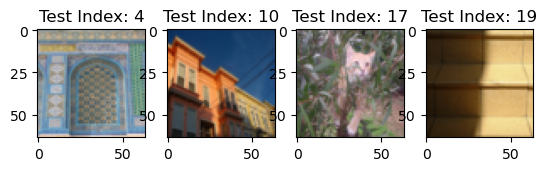

In [18]:
# Define Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Custom Dataset Class (Modified to accept arrays directly)
class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        image = self.x[idx]
        label = self.y[idx]
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.float32)

# Load and Split Data

file_train = h5py.File('train_catvnoncat.h5', 'r')
orig_x = file_train['train_set_x'][:]
orig_y = file_train['train_set_y'][:]

split_idx = 160 + 8 # My SBU last digit is 8 # 160 + 8 = 168 images

n_train_x = orig_x[:split_idx] # new training data
n_train_y = orig_y[:split_idx] # new training labels

n_test_x = orig_x[split_idx:]
n_test_y = orig_y[split_idx:]

print(f"New training Size: {len(n_train_y)}")
print(f"New test Size: {len(n_test_y)}")

# Pipeline for preprocessing of the image. 
transform = transforms.Compose([

    # Convert a tensor or an ndarray to PIL Image
    # Original array is H x W x C
    # 3 channel, default mode is RGB
    transforms.ToPILImage(),

    # Resize into a fixed size same as ImageNet dataset
    transforms.Resize((224, 224)),

    # Flip the image horizontally using the default probability 0.5
    transforms.RandomHorizontalFlip(),

    # Transform to pytorch tensor
    transforms.ToTensor(),

    # Normalizes the pixel values using mean and std of the ImageNet dataset
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create DataLoaders
train_data = MyDataset(n_train_x, n_train_y, transform)
test_data = MyDataset(n_test_x, n_test_y, transform)

train_load = DataLoader(train_data, batch_size=32, shuffle=True)
test_load = DataLoader(test_data, batch_size=32, shuffle=False)

# Load pretrained model. 
# ResNet from https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet18.html#torchvision.models.resnet18
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Binary classification (1 output); ''' Set hyperparameters '''

''' Set hyperparameters '''

# Use Binary Cross Entropy With Logits Loss for binary classification
criterion = nn.BCEWithLogitsLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# Set scheduler to adjust learning rate during training
# StepLR reduce the learning rate by gamma after step_size of epoches
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=1e-6)

model = model.to(device)

# Training Loop
num_epch = 10 # number of epochs

for k in range(num_epch):
    model.train()
    run_loss = 0.0
    
    for i, (images, labels) in enumerate(train_load):
        images = images.to(device)
        labels = labels.to(device).unsqueeze(1)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        run_loss = run_loss + loss.item()
        
    scheduler.step()
    print(f"Epoch [{k+1}/{num_epch}], Loss: {run_loss/len(train_load)}")

# Evaluation Function
def eval_function(loader):
    model.eval()
    correct=0
    total=0
    incorrect_idxs = [] # indices of incorrect predictions
    
    with torch.no_grad():
        for i, (images, labels) in enumerate(loader):
            images = images.to(device)
            labels = labels.to(device).unsqueeze(1)
            
            result = model(images)
            probs = torch.sigmoid(result)
            preds = (probs > 0.5).float()
            
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            # Find errors
            start_idx = i * 32
            for h in range(len(preds)):
                if preds[h] != labels[h]:
                    incorrect_idxs.append(start_idx + h)
                    
    return correct / total, incorrect_idxs

# Report accuracy!!!!!!!!
train_acc, _ = eval_function(train_load)
test_acc, incorrect_index = eval_function(test_load)

print(f"\n Training accuracy: {train_acc*100}%")
print(f"Test accuracy: {test_acc*100}%")
print("Index of incorrect predictions:", incorrect_index)

# Display 4 misclassified images
if len(incorrect_index) > 0:
    for i in range(min(4, len(incorrect_index))):
        idx = incorrect_index[i]
        plt.subplot(1, 4, i+1)
        # Use new_test_x for visualization
        plt.imshow(n_test_x[idx])
        plt.title(f"Test Index: {idx}")
    plt.show()